In [1]:
!gdown --id '1m1QlTa2eetEoOdUYMQZQKDrg_L5v4cdd'
!gdown --id '1IMoIW3JwxqOe7r8cvoy3JMyd8Xp6gTWm'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1m1QlTa2eetEoOdUYMQZQKDrg_L5v4cdd
To: /content/train.csv
100% 21.4M/21.4M [00:00<00:00, 83.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1IMoIW3JwxqOe7r8cvoy3JMyd8Xp6gTWm
To: /content/test.csv
100% 6.93M/6.93M [00:00<00:00, 23.9MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)
df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()
#可觀察到資料無空值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [ ]:
df['Vehicle_Age'].value_counts(sort=True)
#觀察需要轉換資料型態的欄位資料怎麼分佈->只有三種資料內容

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

# Visualization

#### Gender-Age-Histogram
可觀察到30歲以下的女性資料點多於男性，其他年齡層則是男性資料點多

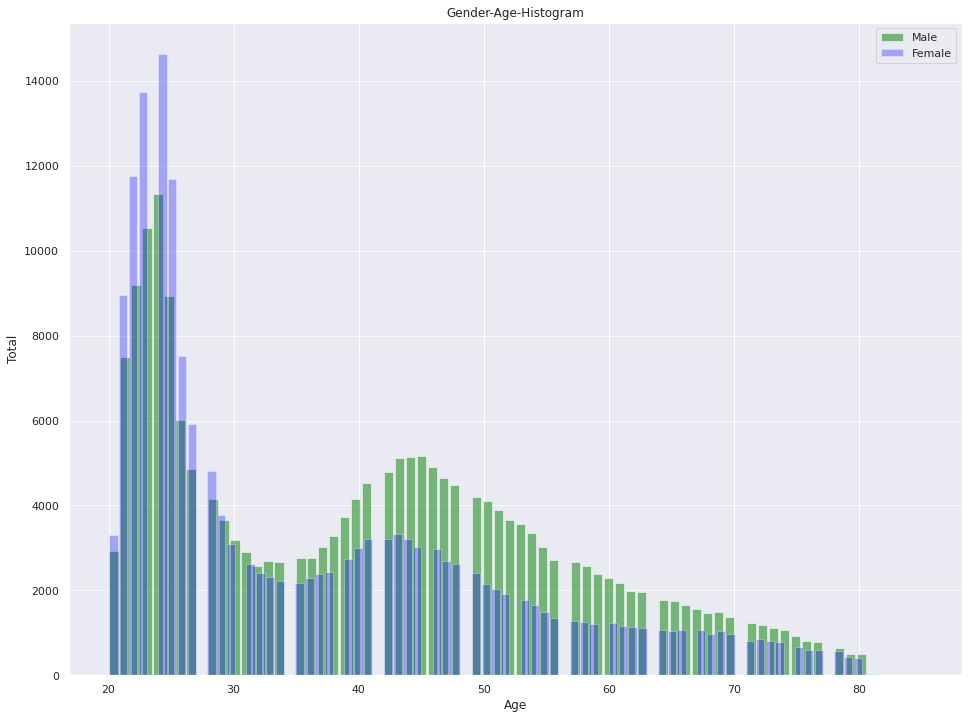

In [10]:
plt.style.use('seaborn-deep')
plt.rcParams["figure.figsize"] = (16, 12)
n, bins, patches = plt.hist(x=df[df['Gender']=='Male']['Age'], bins='auto', color='green', alpha=0.5, rwidth=0.85)
n, bins, patches = plt.hist(x=df[df['Gender']=='Female']['Age'], bins='auto', color='blue', alpha=0.3, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Total')
plt.title('Gender-Age-Histogram')
plt.legend(["Male", "Female"], loc='upper right')

#### Gender-Age-boxplot
男性年齡中位數高於女性，全距也大於女性。

女性年齡多集中20~30間，且有outlier的現象。

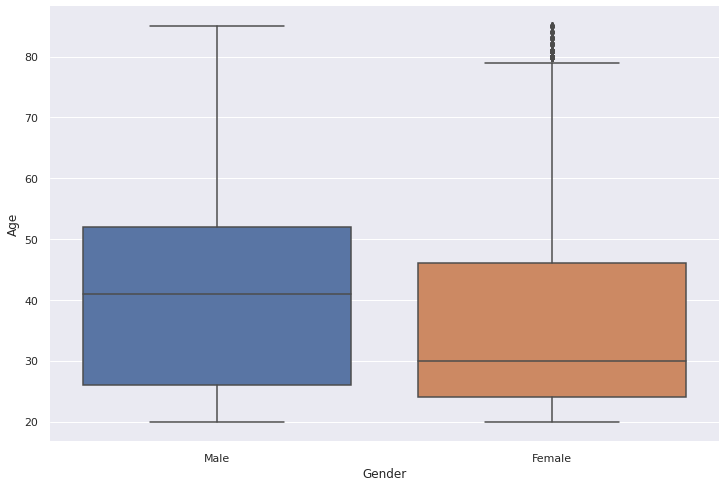

In [11]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x="Gender", y="Age", data=df)
sns.despine(offset=2, trim=True)

#### Gender-piechart
男性數量多於女性，但偏差不多

([<matplotlib.patches.Wedge at 0x7f283e70ffd0>,
 [Text(-0.14047625142251505, 1.0909933193133121, 'Male'),
  Text(0.14047625142251538, -1.0909933193133121, 'Female')],
 [Text(-0.07662340986682638, 0.5950872650799883, '54.1%'),
  Text(0.07662340986682657, -0.5950872650799883, '45.9%')])

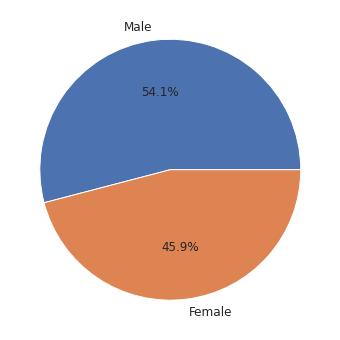

In [ ]:
tmp = df['Gender'].value_counts(sort=True).reset_index(name="count")

plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(tmp['count'],
        labels = tmp['index'],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 12})  

#### Region_Code-countplot
Region_Code表示地區的代碼，非連續性的意義。

因此從此表中可發現資料點普遍集中於28，整體資料分布非常不平均。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


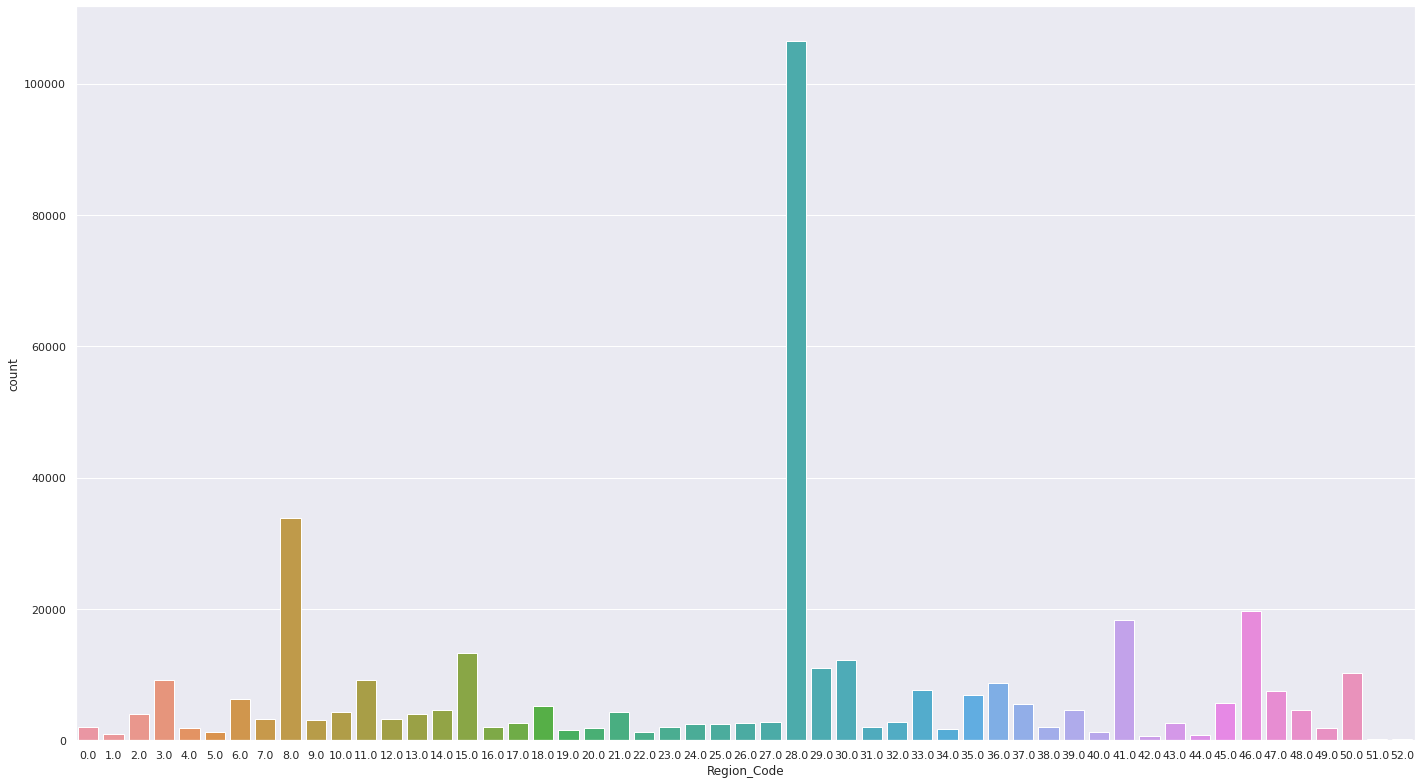

In [ ]:
sns.set(rc={'figure.figsize':(24,13.5)})
sns.countplot(df['Region_Code'])

#### Vehicle_Age-piechart
交通工具年齡普遍為1~2年，超過半數;第二多為小於1年，接近半數;大於2年幾乎無資料點，只佔4％

([<matplotlib.patches.Wedge at 0x7f283ed6ee90>,
 [Text(-0.0884181610264175, 1.096440709204427, '1-2 Year'),
  Text(-0.0566067121881008, -1.0985425254104884, '< 1 Year'),
  Text(1.0904378981683174, -0.14472453226133553, '> 2 Years')],
 [Text(-0.04822808783259136, 0.59805856865696, '52.6%'),
  Text(-0.030876388466236797, -0.5992050138602664, '43.2%'),
  Text(0.5947843080918095, -0.07894065396072847, '4.2%')])

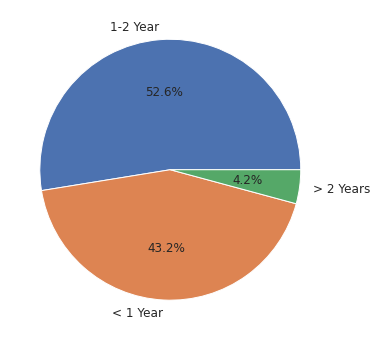

In [ ]:
tmp = df['Vehicle_Age'].value_counts(sort=True).reset_index(name="count")

plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(tmp['count'],
        labels = tmp['index'],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 12})  

#### Policy_Sales_Channel-piechart
Policy_Sales_Channel種類過多，無法全部表示在一張圖表中，因此只取佔比大於平均是的做顯示。

可發現152、26、124、160四種類別的佔比已經將近90％，所以資料點集中於此四大類。

([<matplotlib.patches.Wedge at 0x7f283e4966d0>,
 [Text(0.3895885462104394, 1.0286985781372677, '152.0'),
  Text(-1.0999525218648938, 0.010220060814921085, '26.0'),
  Text(-0.22039191041746942, -1.077695414216159, '124.0'),
  Text(0.671990810621382, -0.8708779193666688, '160.0'),
  Text(0.8935563184047259, -0.6415271668752558, '156.0'),
  Text(0.9961588849445016, -0.4665484711647092, '122.0'),
  Text(1.0543794696157995, -0.3135026858779772, '157.0'),
  Text(1.083137997259417, -0.1918647411403651, '154.0'),
  Text(1.095865301968147, -0.09528504574308731, '151.0'),
  Text(1.0996297898944227, -0.028536383385912877, '163.0')],
 [Text(0.21250284338751238, 0.5611083153476005, '38.5%'),
  Text(-0.5999741028353965, 0.005574578626320592, '22.8%'),
  Text(-0.12021376931861967, -0.587833862299723, '21.1%'),
  Text(0.36654044215711745, -0.47502431965454656, '6.2%'),
  Text(0.4873943554934868, -0.3499239092046849, '3.0%'),
  Text(0.5433593917879098, -0.25448098427165955, '2.8%'),
  Text(0.5751160743

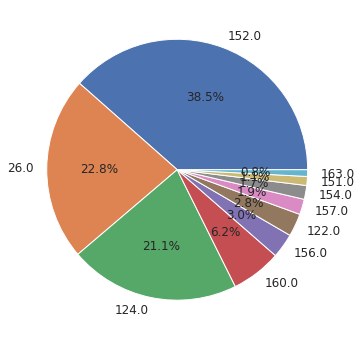

In [ ]:
tmp = df['Policy_Sales_Channel'].value_counts(sort=True).reset_index(name="count").query("count>count.mean()")

plt.pie(tmp['count'],                           # 數值
        labels = tmp['index'],                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12})  # 文字大小

#### Age-Vehicle_Age-Gender-displot
可觀察出不同性別中 交通工具的使用年齡分佈分別如何。

男女性的分佈幾乎相同，皆是小於1年的年齡集中於前段，1~2年的集中於40~50歲，而大於2年的本身資料點不多，因此看不太出分佈。

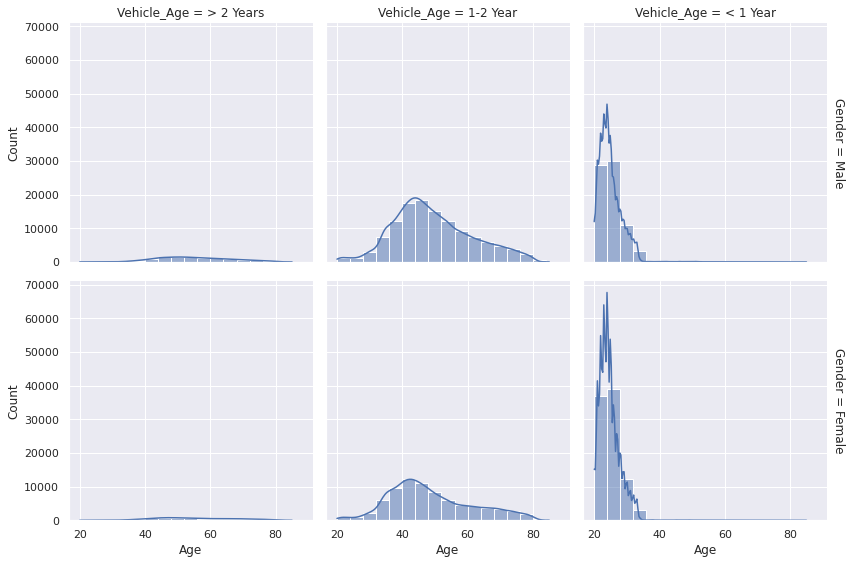

In [ ]:
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Gender", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

#### Age-Vehicle_Age-Driving_License-displot
可觀察出是否擁有駕照 交通工具的使用年齡分佈分別如何。

明顯資料點皆是擁有駕照的，而小於1年的年齡集中於前段，1~2年的集中於40~50歲，而大於2年的本身資料點不多，因此看不太出分佈。

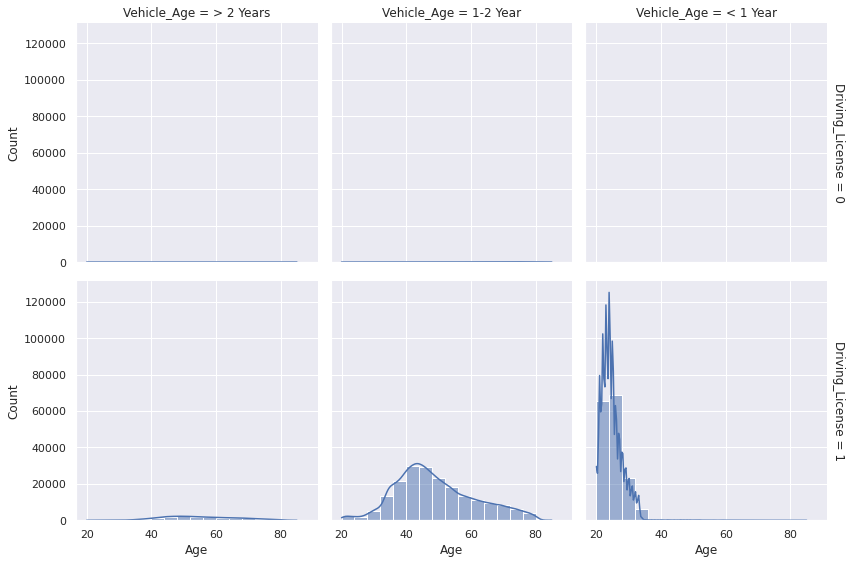

In [ ]:
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Driving_License", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

#### Driving_License-histplot
從上圖延伸，進而探討無擁有駕照的年齡分佈，可發現資料點明顯集中於中高齡層，60~80區段，而20~35區段基本無資料點。

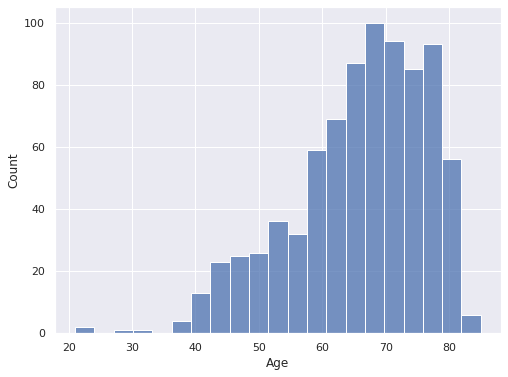

In [ ]:
sns.histplot(data=df[df['Driving_License']==0], x="Age")

#### Driving_License-Gender-histplot
從上圖延伸，進而探討無擁有駕照的年齡分佈，且將其再區分性別。可發現男性資料點明顯集中於中高齡層，60~80區段，而20~35區段基本無資料點。女性資料點則無特別集中在哪個年齡區段，較為平均一點。

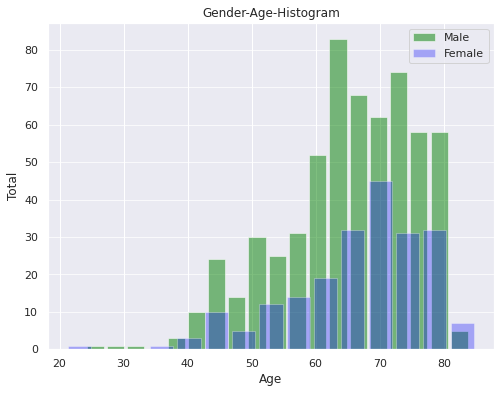

In [ ]:
plt.style.use('seaborn-deep')
n, bins, patches = plt.hist(x=df[(df['Driving_License']==0)&(df['Gender']=='Male')]['Age'], bins='auto', color='green', alpha=0.5, rwidth=0.85)
n, bins, patches = plt.hist(x=df[(df['Driving_License']==0)&(df['Gender']=='Female')]['Age'], bins='auto', color='blue', alpha=0.3, rwidth=0.85)
plt.rcParams["figure.figsize"] = (16, 12)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Total')
plt.title('Gender-Age-Histogram')
plt.legend(["Male", "Female"], loc='upper right')

#### Age-Vehicle_Age-Vehicle_Damage-displot
可觀察出交通工具過去是否曾損壞 交通工具的使用年齡分佈分別如何。

小於1年的年齡集中於前段，1-2年的集中於40-50歲，而大於2年的本身資料點不多，因此看不太出分佈。可發現過去不曾損壞的且車子年齡小於1年的資料點特別多，可能是剛買車就購買保單的狀況。

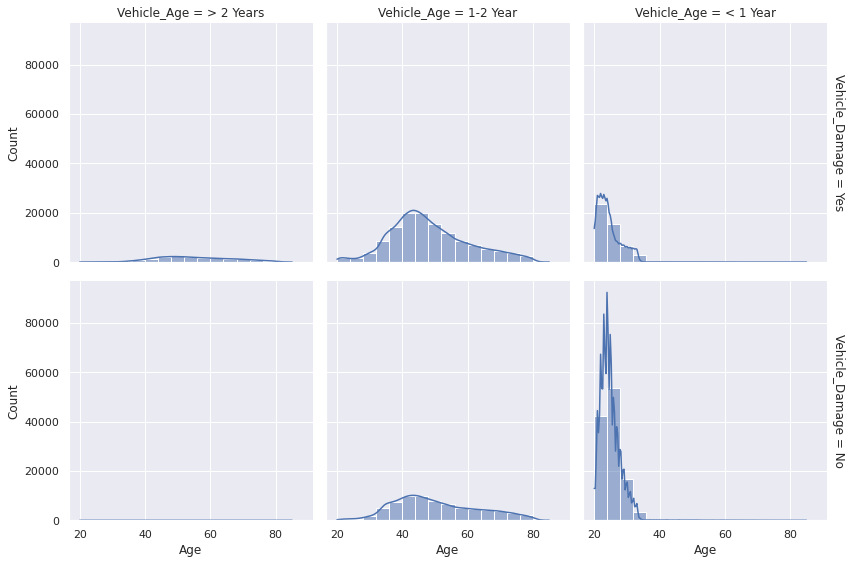

In [ ]:
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Vehicle_Damage", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

#### Age-Vehicle_Age-Oreviously_Insured-displot
可觀察出是否寶過其他保單 交通工具的使用年齡分佈分別如何。

資料分布和上圖差不多，只是將向量變成了是否買過其他保單。

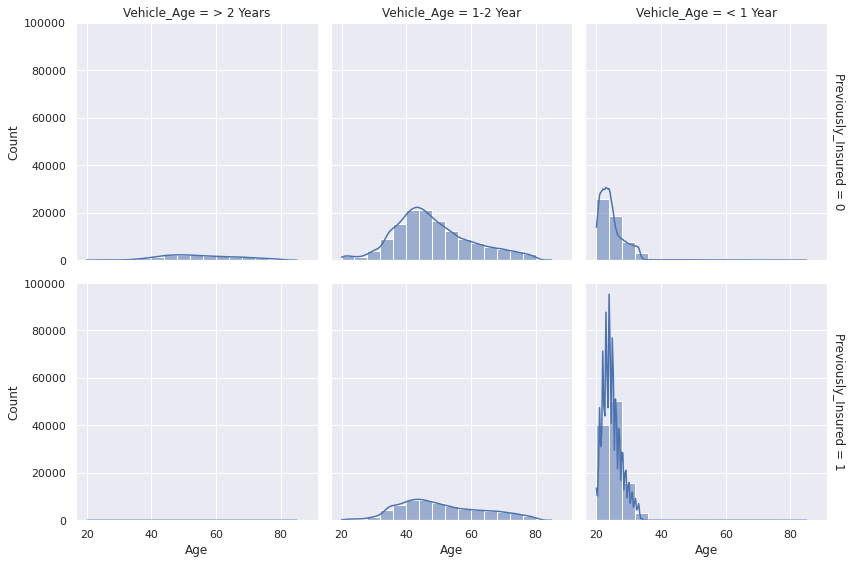

In [ ]:
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Previously_Insured", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

#### Vintage-histplot
分佈幾乎一樣（相對平均），只有兩個range的資料值較少。

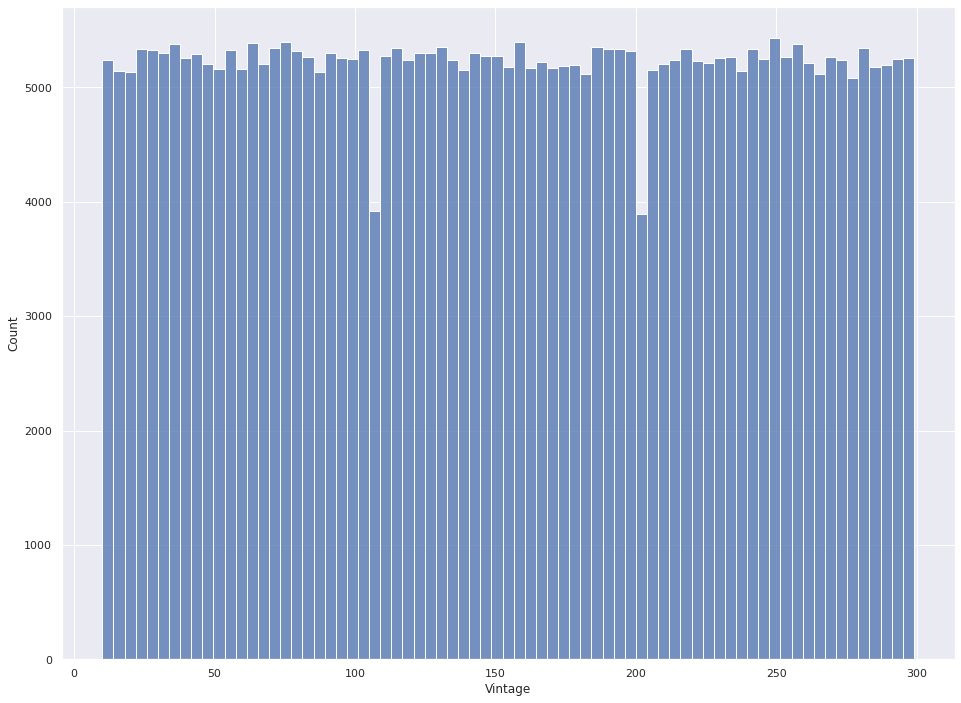

In [ ]:
sns.histplot(data=df, x="Vintage")

#### Annual_Premium-histplot
資料點幾乎全部集中於100000以下。因此進一部探討中位數、上界、下界等。

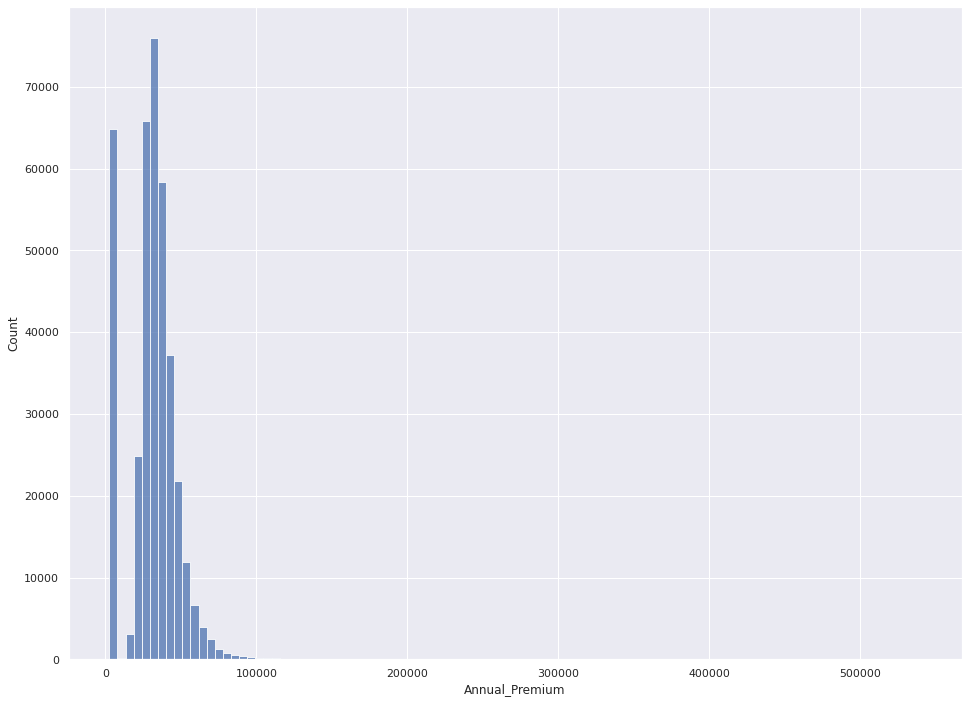

In [ ]:
sns.histplot(data=df, x="Annual_Premium", bins=100)

#### Annual_Premium-boxplot
發現資料點多outlier，整體而言非常集中。

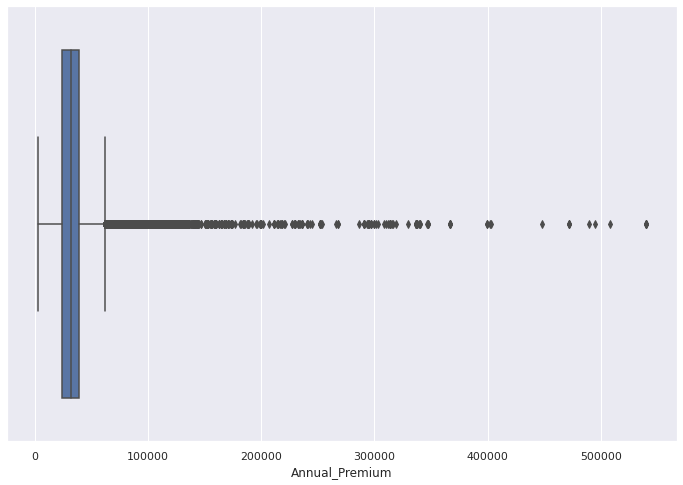

In [14]:
sns.boxplot(data=df, x="Annual_Premium")

#### Response-countplot
欲預測欄位的比例嚴重不平衡，需做under/over sampling將資料平衡，否則會出現模型可能都預測某種類別就會達到非常高準確率的結果。

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


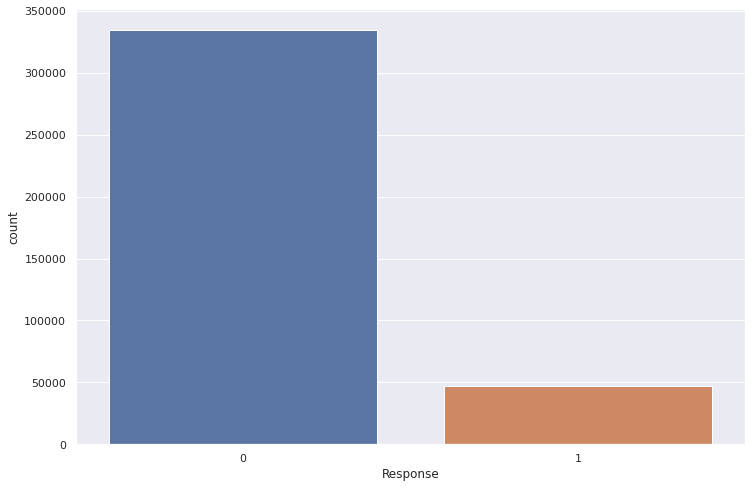

In [12]:
sns.countplot(df['Response'])